<a href="https://colab.research.google.com/github/ShiqingZhang11/IMDb-Data-Science-Project/blob/main/7_0MachineLearning%26DeepLearningModels_BASELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShiqingZhang11/Sentiment-Analysis/blob/main/notebooks/7_0MachineLearning&DeepLearningModels-BASELINE.ipynb)

SyntaxError: invalid decimal literal (<ipython-input-2-42b98c910770>, line 1)

# Table of Contents
- 1. [Project Purpose](#toc1_)    
- 2. [Library Initialization](#toc2_)    
- 3. [LLMs Loading](#toc3_)    
- 4. [Item List Loading](#toc4_)    
- 5. [Reformulation of the Question](#toc5_)    
- 6. [Likert Scale](#toc6_)    
- 7. [Test](#toc7_)
  - 7.0 [Machine Learning & Deep Learning Models - BASELINE](#toc7_0_)
  - 7.1 [Decoder-Only Models](#toc7_1_)
  - 7.2 [Encoder-Only Models](#toc7_2_)
  - 7.3 [Encoder-Decoder Models](#toc7_3_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=7
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. [Project purpose](#toc1_)

Individuals with schizophrenia face a 15-20 year reduction in life expectancy and recovery rates as low as 13.5%, underscoring the urgent need for better care standards. The ambition of PRIME-AI (Person-Reported Insights and Measures Enhanced by AI) is to radically transform the care of individuals with schizophrenia by focusing on their experiences as people, not just as diagnoses and patients.

By integrating Artificial Intelligence (AI) with established psychometric methods, we aim to set a new standard in evaluating health-related quality of life (HRQoL), a patient-reported outcome typically measured through questionnaires. PRIME-AI combines Computerized Adaptive Testing (CAT) based on Item Response Theory (IRT) with advanced Natural Language Processing (NLP) technologies, optimizing the strengths of both methodologies. CAT-IRT offers precision in selecting the most relevant questions based on individual responses and provides valid scores through a unique metric. The NLP technologies, which may include large language models, rule-based systems, machine learning, and hybrid methods, enhance the ability to capture and analyze complex patient qualitative data. NLP approaches, including the use of conversational agents, enhance engagement by adapting and reformulating questions for better comprehension, particularly for individuals with cognitive impairments. NLP enables the synthesis of rich qualitative insights, providing a deeper understanding of individual answers.

The groundbreaking integration of CAT-IRT and AI enables a comprehensive analysis of HRQoL by combining, for the first time, scientifically rigorous quantitative measures with deeply personalized qualitative insights crucial for clinical decision-making. PRIME-AI represents a major advancement in addressing the needs of these extremely vulnerable and neglected individuals. This inclusive approach is key to enhancing the quality and personalization of care, ultimately facilitating successful recovery.

![](interaction_project_dag.png)

This notebook will focus on the conversion of natural language sentences from patients to a Likert Scale operable for the IRT algorithm.

Explanation of "item":

-	ACC: Access and Care Coordination

-	CE: Care Environment

-	IR: Interpersonal Relationships

-	I: Information

-	RD: Respects and Dignity

-	DT: Drug Therapy

-	PSY: Psychological Care Aspects

# 2. [Library Initialization](#toc2_)

# 3. [LLMs loading](#toc3_)

This is only for Decoder-Only Models code. We use `ollama` and `langchain` frameworks to interract with LLMs. Use the following command to initiate `ollama` :


<p style="color:red;">ollama serve</p>


Download a model to use :


<p style="color:red;">ollama run mistral</p>


Use model with langchain API.

# 4. [Item List Loading](#toc4_)

The Excel file 'traindata' was generated using GPT by asking it to provide 50 different responses to the questions in our questionnaire. The responses were carefully crafted to achieve a balanced distribution across different Likert scale values, making this a simulated, simplified, and over-idealized dataset. We tested various AI models to ensure that each model performs at its best in terms of accuracy, with the goal of applying these models to real-world datasets in the future. When prompted, simply select 'traindata' to import the data. Default virtual environment here is env001.

In [ ]:
import sys
sys.executable

'/mnt/c/Users/Shiqi/Desktop/APHM/env001/bin/python'

In [ ]:
%%time
import pandas as pd
import io
from tkinter import Tk, filedialog
root = Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Select an Excel file", filetypes=[("Excel files", "*.xlsx *.xls")])
item_bank = pd.read_excel(file_path, header=0).dropna()
item_bank

CPU times: user 797 ms, sys: 100 ms, total: 898 ms
Wall time: 7.11 s


,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2
1,2,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j'ai souvent eu du mal à joindre un profe...",0
2,3,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Parfois, c'était facile, mais il y avait aussi...",1
3,4,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, je n'ai jamais eu de problème pour contac...",2
4,5,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps avant ...",0
...,...,...,...,...,...,...
5995,46,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Oui, à chaque consultation, mes opinions étaie...",2
5996,47,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Non, je me suis souvent senti(e) exclu(e) des ...",0
5997,48,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Globalement, je pense que mes opinions étaient...",1
5998,49,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Oui, mes opinions étaient toujours écoutées et...",2


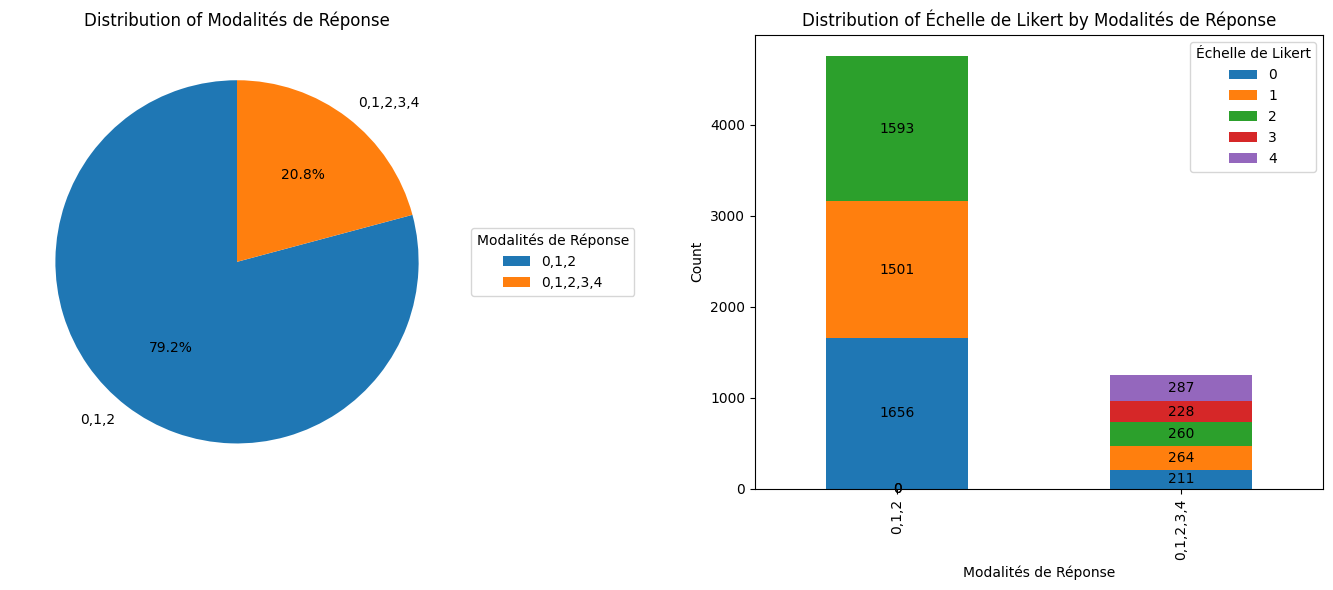

In [ ]:
import matplotlib.pyplot as plt

value_counts = item_bank['modalités de réponse'].value_counts()
distribution = pd.crosstab(item_bank['modalités de réponse'], item_bank['échelle de Likert'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Modalités de Réponse')
ax1.legend(value_counts.index, title="Modalités de Réponse", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax2 = distribution.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Distribution of Échelle de Likert by Modalités de Réponse')
ax2.set_xlabel('Modalités de Réponse')
ax2.set_ylabel('Count')
ax2.legend(title='Échelle de Likert')

for container in ax2.containers:
    ax2.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

# 5. [Reformulation of the question](#toc5_)

If the patient didn't great understand the question, we need to rephrase it.

We choose a LLM Few-Shot Learning approach for this task. For each item, we used a big model language (ChatGPT-4o) for generating a dozen of possible reformulation.
After a phase of prompt engenering, we have succeeded to the following code.

Just modify the `num` variable to select an item in the choosen questionaire.

In [ ]:
%%time
from pydantic import BaseModel, ValidationError, conint
from langchain_ollama import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Item number - You can modify it
num = 20

item = item_bank["libellé"].iloc[num]
# reformulation = item_bank["reformulations"].iloc[num]
reformulation = item_bank["réponse"].iloc[num]
item_response_group = item_bank["modalités de réponse"].iloc[num]
prompt = ChatPromptTemplate.from_messages([
    ("system", "Tu es un médecin en psychiatrie qui fait passer un questionnaire de satisfaction à un patient qui vient d'être hospitalisé dans ton service."),
    ("system", "Tes réponses seront exclusivement en Français en style décontracté."),
    ("system", "Reformule cette question pour qu'elle soit plus compréhensible pour le patient. Assure-toi d'utiliser des mots simples et un langage clair."),
    ("system", f"Voila des exemples de phrases dont tu peux t'inspirer pour la reformulation : {reformulation}."),
    ("system", "Utilise le vouvoiement dans tes réponses. Vouvoie le patient."),
    ("system", "Répond avec une phrase en Français et rien d'autre, pas d'explication."),
    ("user", "Voila la question que le patient ne comprend pas bien : {input}")
])

output_parser = StrOutputParser()

chain = prompt | OllamaLLM(model="phi3.5", temperature=0.0) | output_parser

answer = chain.invoke({"input", item})
answer = answer.strip()
print(f"Original question : {item}")
print(f"Groupe de réponse attendu : {item_response_group}")
print(f"Reformulation de la question : {answer}")

Original question : Avez-vous trouvé que vous avez pu facilement contacter un professionnel de santé lorsque vous en avez ressenti(e) le besoin ?
Groupe de réponse attendu : 0,1,2
Reformulation de la question : Pouviez-vous dire si il était simple pour vous d'avoir accès à une aide médicale quand cela fallait vraiment l'aider?
CPU times: user 1.33 s, sys: 337 ms, total: 1.67 s
Wall time: 17.6 s


# 6. [Likert Scale](#toc6_)

LLM generating Likert Scale.

Please note that the range of Likert score vary by items. This range is given by the `item_response_group` variable.

In [ ]:
%%time
if item_response_group == "0,1,2":

	prompt = ChatPromptTemplate.from_messages([
		("system", f"Nous posons dans le cadre d'une évaluation de la qualité des soins la question suivante à un patient sortant d'une hospitalisation en service de psychiatrie : {item}."),
		("system", "En utilisant la réponse suivante, classe la sur une échelle de Likert de 0 à 2 avec 0=pas d'accord, 1= ni d'accord ni pas d'accord, 2=d'accord:"),
		("system", "Répond avec seulement un chiffre entre 0 à 2 sans commentaire ni explication."),
		("system", "Voici quelques exemples de réponse attendue : 1. 2. 0."),
		("system", "Si le patient ne répond pas à la question, la réponse est N"),
		("system", "Je veux que tu donnes à la suite de ta réponse une explication en Français uniquement."),
		("system", "Donne moi en pourcentage la confiance que tu a en ta réponse."),
		("user", "{input}")
	])

elif item_response_group == "0,1,2,3,4":
    prompt = ChatPromptTemplate.from_messages([
		("system", f"Nous posons dans le cadre d'une évaluation de la qualité des soins la question suivante à un patient sortant d'une hospitalisation en service de psychiatrie : {item}."),
		("system", "En utilisant la réponse suivante, classe la sur une échelle de Likert de 0 à 4 avec 0=pas du tout d'accord, 1=pas d'accord, 2=ni d'accord ni pas d'accord, 3=d'accord, 4=tout à fait d'accord"),
		("system", "Répond avec seulement un chiffre entre 0 à 4 sans commentaire ni explication."),
		("system", "Voici quelques exemples de réponse attendue : 1. 2. 0. 3. 4."),
		("system", "Si le patient ne répond pas à la question, la réponse est N"),
		("system", "Je veux que tu donnes à la suite de ta réponse une explication en Français uniquement."),
		("system", "Donne moi en pourcentage la confiance que tu a en ta réponse."),
		("user", "{input}")
	])

output_parser = StrOutputParser()

chain = prompt | OllamaLLM(model="phi3.5", temperature=0.0) | output_parser

answer = chain.invoke({"input":"ouais ça va c'est pas trop mal"})
likert_score = answer.strip()[0]
print(f"Likert score : {likert_score}")
print(answer)
class LikertResponse(BaseModel):
    score: conint(ge=0, le=4)

# Validation avec Pydantic
try:
    validated_response = LikertResponse(score=int(likert_score))
    print(f"Validated Likert Score: {validated_response.score}")
except ValidationError as e:
    print(f"Validation Error: {e}")

Likert score : 1
1 (Cela indique un certain niveau d'accord, bien qu'il puisse y avoir des améliorations).  
Pourcentage de confiance : 70%  
Explication en Français: Le patient exprime une certaine satisfaction avec le système actuel tout en reconnaissant que les choses pourraient être encore meilleures. Cela suggère un niveau modéré d'accord, ce qui justifie la note '1'. Cependant, étant donné qu'ils ne sont pas totalement satisfaits et voient des possibilités de progrès, leur confiance dans cette réponse est légèrement inférieure à 100%, soit environ 70%.
Validated Likert Score: 1
CPU times: user 86.5 ms, sys: 0 ns, total: 86.5 ms
Wall time: 2.18 s


A faire :

- Génération données synthétiques sur l'échelle de Likert
- Génration données synthétiques sur les items
- Utilisation de parser Pydantic pour formatter la sortie des LLM. [Structurer la sortie des LLM](https://simmering.dev/blog/structured_output/)
  - [Llama index](https://docs.llamaindex.ai/en/stable/examples/output_parsing/llm_program/)
  - [Langchain](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/types/pydantic/)

# 7. [Test](#toc7_)

## 7.0 [Machine Learning & Deep Learning Models - BASELINE](#toc7_0_)
<div style="background-color: lightSkyBlue; width: 100%; height: 50px; padding: 30px; display: center; justify-content: center; align-items: center;">
  <p style="text-align: center; font-size: 30px; font-weight: bold;">
    Machine Learning & Deep Learning Models - BASELINE
  </p>
</div>

### 7.0.1 [Machine Learning Models](#toc7_0_1_)
<div style="background-color: lightskyblue; width: 100%; height: 30px; padding: 10px; display: center; justify-content: center; align-items: center;">
  <p style="text-align: center; font-size: 20px; font-weight:bold;">
    Six Classic Machine Learning Models
  </p>
</div>

[nltk_data] Downloading package stopwords to /home/sz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[I 2024-10-15 11:18:03,416] A new study created in memory with name: no-name-d5fe6f66-4062-4fb0-9c49-12c3a7e2ae08
[I 2024-10-15 11:18:03,500] Trial 0 finished with value: 0.785 and parameters: {'C': 0.0888984570626266, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 0 with value: 0.785.
[I 2024-10-15 11:18:03,561] Trial 1 finished with value: 0.5433333333333333 and parameters: {'C': 0.027736060028648896, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 0 with value: 0.785.
[I 2024-10-15 11:18:03,602] Trial 2 finished with value: 0.7866666666666666 and parameters: {'C': 0.16490623298934468, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 2 with value: 0.7866666666666666.


Running hyperparameter tuning for Logistic Regression

=============== Logistic Regression Trial 1 on Training & Validation Set ===============
Training Set: Accuracy=0.774722, Precision=0.774722, Recall=0.774722, F1 Score=0.774722
Validation Set: Accuracy=0.785000, Precision=0.785000, Recall=0.785000, F1 Score=0.785000

=============== Logistic Regression Trial 2 on Training & Validation Set ===============
Training Set: Accuracy=0.546667, Precision=0.546667, Recall=0.546667, F1 Score=0.546667
Validation Set: Accuracy=0.543333, Precision=0.543333, Recall=0.543333, F1 Score=0.543333

=============== Logistic Regression Trial 3 on Training & Validation Set ===============
Training Set: Accuracy=0.776389, Precision=0.776389, Recall=0.776389, F1 Score=0.776389
Validation Set: Accuracy=0.786667, Precision=0.786667, Recall=0.786667, F1 Score=0.786667


[I 2024-10-15 11:18:03,661] Trial 3 finished with value: 0.8533333333333334 and parameters: {'C': 4.371221877313698, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 3 with value: 0.8533333333333334.
[I 2024-10-15 11:18:03,690] Trial 4 finished with value: 0.7866666666666666 and parameters: {'C': 0.028572138998517994, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 3 with value: 0.8533333333333334.
[I 2024-10-15 11:18:03,820] Trial 5 finished with value: 0.7941666666666667 and parameters: {'C': 0.20757166373411953, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 3 with value: 0.8533333333333334.
[I 2024-10-15 11:18:03,853] Trial 6 finished with value: 0.7691666666666667 and parameters: {'C': 0.03325034154002841, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 3 with value: 0.8533333333333334.



=============== Logistic Regression Trial 4 on Training & Validation Set ===============
Training Set: Accuracy=0.961944, Precision=0.961944, Recall=0.961944, F1 Score=0.961944
Validation Set: Accuracy=0.853333, Precision=0.853333, Recall=0.853333, F1 Score=0.853333

=============== Logistic Regression Trial 5 on Training & Validation Set ===============
Training Set: Accuracy=0.776667, Precision=0.776667, Recall=0.776667, F1 Score=0.776667
Validation Set: Accuracy=0.786667, Precision=0.786667, Recall=0.786667, F1 Score=0.786667

=============== Logistic Regression Trial 6 on Training & Validation Set ===============
Training Set: Accuracy=0.782778, Precision=0.782778, Recall=0.782778, F1 Score=0.782778
Validation Set: Accuracy=0.794167, Precision=0.794167, Recall=0.794167, F1 Score=0.794167

=============== Logistic Regression Trial 7 on Training & Validation Set ===============
Training Set: Accuracy=0.779444, Precision=0.779444, Recall=0.779444, F1 Score=0.779444
Validation Set: Ac

/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-10-15 11:18:04,425] Trial 7 finished with value: 0.8433333333333334 and parameters: {'C': 1.043885215401435, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 3 with value: 0.8533333333333334.



=============== Logistic Regression Trial 8 on Training & Validation Set ===============
Training Set: Accuracy=0.877500, Precision=0.877500, Recall=0.877500, F1 Score=0.877500
Validation Set: Accuracy=0.843333, Precision=0.843333, Recall=0.843333, F1 Score=0.843333


[I 2024-10-15 11:18:04,671] Trial 8 finished with value: 0.875 and parameters: {'C': 16.85318727739498, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 8 with value: 0.875.
[I 2024-10-15 11:18:04,732] Trial 9 finished with value: 0.8458333333333333 and parameters: {'C': 3.0294367731907514, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 8 with value: 0.875.



=============== Logistic Regression Trial 9 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.875000, Precision=0.875000, Recall=0.875000, F1 Score=0.875000

=============== Logistic Regression Trial 10 on Training & Validation Set ===============
Training Set: Accuracy=0.945833, Precision=0.945833, Recall=0.945833, F1 Score=0.945833
Validation Set: Accuracy=0.845833, Precision=0.845833, Recall=0.845833, F1 Score=0.845833
Best score for Logistic Regression: 0.875
Best trial params for Logistic Regression in Trial 9: {'C': 16.85318727739498, 'penalty': 'l1', 'solver': 'liblinear'}


=============== Logistic Regression Final Evaluation on Test Set ===============
Test Set: Accuracy=0.870000, Precision=0.870000, Recall=0.870000, F1 Score=0.870000


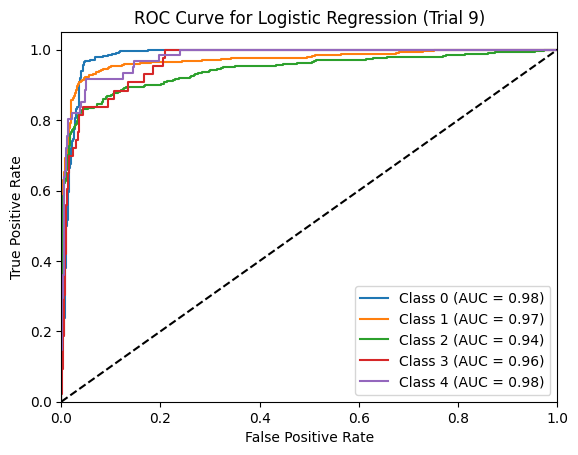

[I 2024-10-15 11:18:05,357] A new study created in memory with name: no-name-7ae317a9-8980-4cde-b057-82c2b97d7c32
[I 2024-10-15 11:18:05,374] Trial 0 finished with value: 0.7908333333333334 and parameters: {'alpha': 0.4230038794710852}. Best is trial 0 with value: 0.7908333333333334.
[I 2024-10-15 11:18:05,390] Trial 1 finished with value: 0.7791666666666667 and parameters: {'alpha': 0.7981045286098278}. Best is trial 0 with value: 0.7908333333333334.
[I 2024-10-15 11:18:05,407] Trial 2 finished with value: 0.7741666666666667 and parameters: {'alpha': 1.491699714691553}. Best is trial 0 with value: 0.7908333333333334.
[I 2024-10-15 11:18:05,424] Trial 3 finished with value: 0.7991666666666667 and parameters: {'alpha': 0.1728987793180065}. Best is trial 3 with value: 0.7991666666666667.
[I 2024-10-15 11:18:05,441] Trial 4 finished with value: 0.7991666666666667 and parameters: {'alpha': 0.20138179407551568}. Best is trial 3 with value: 0.7991666666666667.
[I 2024-10-15 11:18:05,458] Tri

Running hyperparameter tuning for Naive Bayes

=============== Naive Bayes Trial 1 on Training & Validation Set ===============
Training Set: Accuracy=0.873611, Precision=0.873611, Recall=0.873611, F1 Score=0.873611
Validation Set: Accuracy=0.790833, Precision=0.790833, Recall=0.790833, F1 Score=0.790833

=============== Naive Bayes Trial 2 on Training & Validation Set ===============
Training Set: Accuracy=0.847500, Precision=0.847500, Recall=0.847500, F1 Score=0.847500
Validation Set: Accuracy=0.779167, Precision=0.779167, Recall=0.779167, F1 Score=0.779167

=============== Naive Bayes Trial 3 on Training & Validation Set ===============
Training Set: Accuracy=0.833333, Precision=0.833333, Recall=0.833333, F1 Score=0.833333
Validation Set: Accuracy=0.774167, Precision=0.774167, Recall=0.774167, F1 Score=0.774167

=============== Naive Bayes Trial 4 on Training & Validation Set ===============
Training Set: Accuracy=0.921667, Precision=0.921667, Recall=0.921667, F1 Score=0.921667
Vali

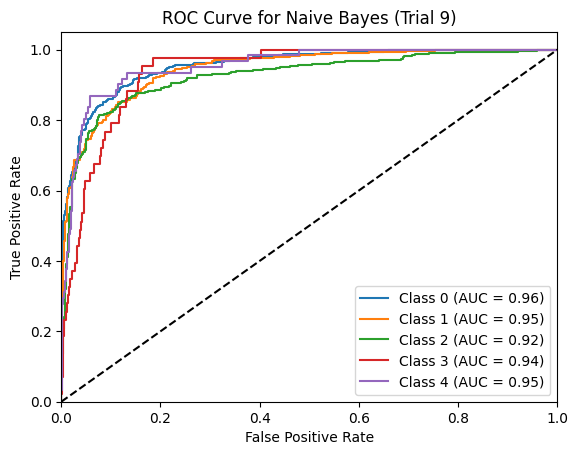

[I 2024-10-15 11:18:05,899] A new study created in memory with name: no-name-432dde46-5a01-4230-9b3a-a912c0e2f82a


Running hyperparameter tuning for SVM


[I 2024-10-15 11:18:31,800] Trial 0 finished with value: 0.9125 and parameters: {'C': 2.664101284189113, 'kernel': 'rbf'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 1 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.912500, Precision=0.912500, Recall=0.912500, F1 Score=0.912500


[I 2024-10-15 11:18:44,975] Trial 1 finished with value: 0.8966666666666666 and parameters: {'C': 1.704474042677256, 'kernel': 'linear'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 2 on Training & Validation Set ===============
Training Set: Accuracy=0.985000, Precision=0.985000, Recall=0.985000, F1 Score=0.985000
Validation Set: Accuracy=0.896667, Precision=0.896667, Recall=0.896667, F1 Score=0.896667


[I 2024-10-15 11:19:14,740] Trial 2 finished with value: 0.8558333333333333 and parameters: {'C': 22.02317418911021, 'kernel': 'poly'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 3 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.855833, Precision=0.855833, Recall=0.855833, F1 Score=0.855833


[I 2024-10-15 11:19:44,464] Trial 3 finished with value: 0.8266666666666667 and parameters: {'C': 0.9264695749547956, 'kernel': 'poly'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 4 on Training & Validation Set ===============
Training Set: Accuracy=0.998889, Precision=0.998889, Recall=0.998889, F1 Score=0.998889
Validation Set: Accuracy=0.826667, Precision=0.826667, Recall=0.826667, F1 Score=0.826667


[I 2024-10-15 11:20:11,107] Trial 4 finished with value: 0.9108333333333334 and parameters: {'C': 78.49842479724187, 'kernel': 'rbf'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 5 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.910833, Precision=0.910833, Recall=0.910833, F1 Score=0.910833


[I 2024-10-15 11:20:35,063] Trial 5 finished with value: 0.7633333333333333 and parameters: {'C': 0.1684621285999226, 'kernel': 'rbf'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 6 on Training & Validation Set ===============
Training Set: Accuracy=0.818611, Precision=0.818611, Recall=0.818611, F1 Score=0.818611
Validation Set: Accuracy=0.763333, Precision=0.763333, Recall=0.763333, F1 Score=0.763333


[I 2024-10-15 11:21:04,845] Trial 6 finished with value: 0.7975 and parameters: {'C': 0.7433736100558141, 'kernel': 'poly'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 7 on Training & Validation Set ===============
Training Set: Accuracy=0.984722, Precision=0.984722, Recall=0.984722, F1 Score=0.984722
Validation Set: Accuracy=0.797500, Precision=0.797500, Recall=0.797500, F1 Score=0.797500


[I 2024-10-15 11:21:17,524] Trial 7 finished with value: 0.9016666666666666 and parameters: {'C': 58.159904242153274, 'kernel': 'linear'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 8 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.901667, Precision=0.901667, Recall=0.901667, F1 Score=0.901667


[I 2024-10-15 11:21:49,147] Trial 8 finished with value: 0.8558333333333333 and parameters: {'C': 12.570999557606664, 'kernel': 'poly'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 9 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.855833, Precision=0.855833, Recall=0.855833, F1 Score=0.855833


[I 2024-10-15 11:22:17,446] Trial 9 finished with value: 0.9108333333333334 and parameters: {'C': 4.57341172971112, 'kernel': 'rbf'}. Best is trial 0 with value: 0.9125.



=============== SVM Trial 10 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.910833, Precision=0.910833, Recall=0.910833, F1 Score=0.910833
Best score for SVM: 0.9125
Best trial params for SVM in Trial 1: {'C': 2.664101284189113, 'kernel': 'rbf'}


=============== SVM Final Evaluation on Test Set ===============
Test Set: Accuracy=0.904167, Precision=0.904167, Recall=0.904167, F1 Score=0.904167


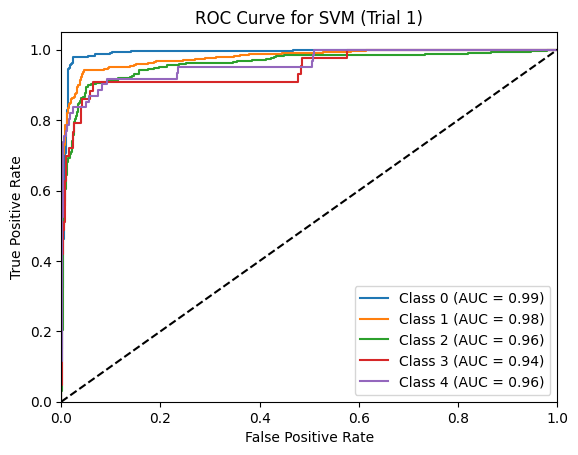

[I 2024-10-15 11:22:24,713] A new study created in memory with name: no-name-5318c074-20df-4a7f-87c0-ee0a28fc58ec


Running hyperparameter tuning for Random Forest


[I 2024-10-15 11:22:26,442] Trial 0 finished with value: 0.8658333333333333 and parameters: {'n_estimators': 197, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8658333333333333.



=============== Random Forest Trial 1 on Training & Validation Set ===============
Training Set: Accuracy=0.962500, Precision=0.962500, Recall=0.962500, F1 Score=0.962500
Validation Set: Accuracy=0.865833, Precision=0.865833, Recall=0.865833, F1 Score=0.865833


[I 2024-10-15 11:22:27,252] Trial 1 finished with value: 0.8533333333333334 and parameters: {'n_estimators': 113, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8658333333333333.



=============== Random Forest Trial 2 on Training & Validation Set ===============
Training Set: Accuracy=0.917222, Precision=0.917222, Recall=0.917222, F1 Score=0.917222
Validation Set: Accuracy=0.853333, Precision=0.853333, Recall=0.853333, F1 Score=0.853333


[I 2024-10-15 11:22:28,255] Trial 2 finished with value: 0.805 and parameters: {'n_estimators': 276, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8658333333333333.



=============== Random Forest Trial 3 on Training & Validation Set ===============
Training Set: Accuracy=0.834444, Precision=0.834444, Recall=0.834444, F1 Score=0.834444
Validation Set: Accuracy=0.805000, Precision=0.805000, Recall=0.805000, F1 Score=0.805000


[I 2024-10-15 11:22:30,542] Trial 3 finished with value: 0.8608333333333333 and parameters: {'n_estimators': 263, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8658333333333333.



=============== Random Forest Trial 4 on Training & Validation Set ===============
Training Set: Accuracy=0.938611, Precision=0.938611, Recall=0.938611, F1 Score=0.938611
Validation Set: Accuracy=0.860833, Precision=0.860833, Recall=0.860833, F1 Score=0.860833


[I 2024-10-15 11:22:33,433] Trial 4 finished with value: 0.8716666666666667 and parameters: {'n_estimators': 281, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.8716666666666667.



=============== Random Forest Trial 5 on Training & Validation Set ===============
Training Set: Accuracy=0.974722, Precision=0.974722, Recall=0.974722, F1 Score=0.974722
Validation Set: Accuracy=0.871667, Precision=0.871667, Recall=0.871667, F1 Score=0.871667


[I 2024-10-15 11:22:34,199] Trial 5 finished with value: 0.8358333333333333 and parameters: {'n_estimators': 119, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.8716666666666667.



=============== Random Forest Trial 6 on Training & Validation Set ===============
Training Set: Accuracy=0.881111, Precision=0.881111, Recall=0.881111, F1 Score=0.881111
Validation Set: Accuracy=0.835833, Precision=0.835833, Recall=0.835833, F1 Score=0.835833


[I 2024-10-15 11:22:34,888] Trial 6 finished with value: 0.8083333333333333 and parameters: {'n_estimators': 167, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.8716666666666667.



=============== Random Forest Trial 7 on Training & Validation Set ===============
Training Set: Accuracy=0.833333, Precision=0.833333, Recall=0.833333, F1 Score=0.833333
Validation Set: Accuracy=0.808333, Precision=0.808333, Recall=0.808333, F1 Score=0.808333


[I 2024-10-15 11:22:34,724] Trial 7 finished with value: 0.805 and parameters: {'n_estimators': 165, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.8716666666666667.



=============== Random Forest Trial 8 on Training & Validation Set ===============
Training Set: Accuracy=0.836111, Precision=0.836111, Recall=0.836111, F1 Score=0.836111
Validation Set: Accuracy=0.805000, Precision=0.805000, Recall=0.805000, F1 Score=0.805000


[I 2024-10-15 11:22:35,118] Trial 8 finished with value: 0.7791666666666667 and parameters: {'n_estimators': 115, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.8716666666666667.



=============== Random Forest Trial 9 on Training & Validation Set ===============
Training Set: Accuracy=0.803333, Precision=0.803333, Recall=0.803333, F1 Score=0.803333
Validation Set: Accuracy=0.779167, Precision=0.779167, Recall=0.779167, F1 Score=0.779167


[I 2024-10-15 11:22:35,792] Trial 9 finished with value: 0.7991666666666667 and parameters: {'n_estimators': 191, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.8716666666666667.



=============== Random Forest Trial 10 on Training & Validation Set ===============
Training Set: Accuracy=0.818889, Precision=0.818889, Recall=0.818889, F1 Score=0.818889
Validation Set: Accuracy=0.799167, Precision=0.799167, Recall=0.799167, F1 Score=0.799167
Best score for Random Forest: 0.8716666666666667
Best trial params for Random Forest in Trial 5: {'n_estimators': 281, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1}


=============== Random Forest Final Evaluation on Test Set ===============
Test Set: Accuracy=0.865000, Precision=0.865000, Recall=0.865000, F1 Score=0.865000


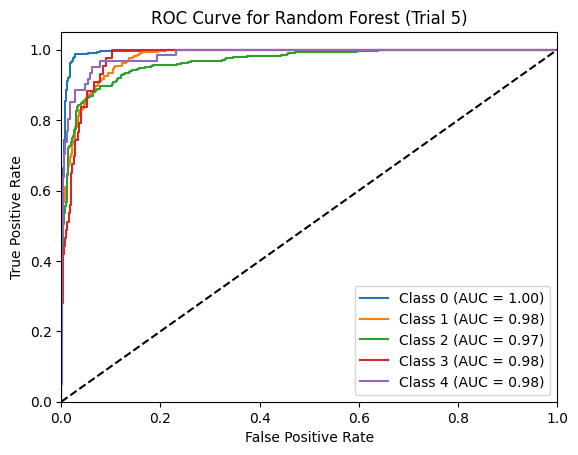

[I 2024-10-15 11:22:38,951] A new study created in memory with name: no-name-1908d980-7e03-4c9c-bee1-6695625c24b4


Running hyperparameter tuning for XGBoost


[I 2024-10-15 11:22:46,802] Trial 0 finished with value: 0.9016666666666666 and parameters: {'learning_rate': 0.2217191217324616, 'n_estimators': 285, 'max_depth': 8}. Best is trial 0 with value: 0.9016666666666666.



=============== XGBoost Trial 1 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.901667, Precision=0.901667, Recall=0.901667, F1 Score=0.901667


[I 2024-10-15 11:22:48,303] Trial 1 finished with value: 0.8533333333333334 and parameters: {'learning_rate': 0.07088550278440872, 'n_estimators': 112, 'max_depth': 3}. Best is trial 0 with value: 0.9016666666666666.



=============== XGBoost Trial 2 on Training & Validation Set ===============
Training Set: Accuracy=0.890556, Precision=0.890556, Recall=0.890556, F1 Score=0.890556
Validation Set: Accuracy=0.853333, Precision=0.853333, Recall=0.853333, F1 Score=0.853333


[I 2024-10-15 11:22:57,122] Trial 2 finished with value: 0.8925 and parameters: {'learning_rate': 0.05113439049256692, 'n_estimators': 248, 'max_depth': 6}. Best is trial 0 with value: 0.9016666666666666.



=============== XGBoost Trial 3 on Training & Validation Set ===============
Training Set: Accuracy=0.991667, Precision=0.991667, Recall=0.991667, F1 Score=0.991667
Validation Set: Accuracy=0.892500, Precision=0.892500, Recall=0.892500, F1 Score=0.892500


[I 2024-10-15 11:23:15,017] Trial 3 finished with value: 0.8908333333333334 and parameters: {'learning_rate': 0.018442182128546508, 'n_estimators': 286, 'max_depth': 9}. Best is trial 0 with value: 0.9016666666666666.



=============== XGBoost Trial 4 on Training & Validation Set ===============
Training Set: Accuracy=0.985833, Precision=0.985833, Recall=0.985833, F1 Score=0.985833
Validation Set: Accuracy=0.890833, Precision=0.890833, Recall=0.890833, F1 Score=0.890833


[I 2024-10-15 11:23:17,294] Trial 4 finished with value: 0.8525 and parameters: {'learning_rate': 0.060608693839666154, 'n_estimators': 140, 'max_depth': 3}. Best is trial 0 with value: 0.9016666666666666.



=============== XGBoost Trial 5 on Training & Validation Set ===============
Training Set: Accuracy=0.898889, Precision=0.898889, Recall=0.898889, F1 Score=0.898889
Validation Set: Accuracy=0.852500, Precision=0.852500, Recall=0.852500, F1 Score=0.852500


[I 2024-10-15 11:23:20,288] Trial 5 finished with value: 0.8433333333333334 and parameters: {'learning_rate': 0.027654610932438838, 'n_estimators': 197, 'max_depth': 3}. Best is trial 0 with value: 0.9016666666666666.



=============== XGBoost Trial 6 on Training & Validation Set ===============
Training Set: Accuracy=0.866667, Precision=0.866667, Recall=0.866667, F1 Score=0.866667
Validation Set: Accuracy=0.843333, Precision=0.843333, Recall=0.843333, F1 Score=0.843333


[I 2024-10-15 11:23:28,295] Trial 6 finished with value: 0.9083333333333333 and parameters: {'learning_rate': 0.0745492109812318, 'n_estimators': 179, 'max_depth': 9}. Best is trial 6 with value: 0.9083333333333333.



=============== XGBoost Trial 7 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.908333, Precision=0.908333, Recall=0.908333, F1 Score=0.908333


[I 2024-10-15 11:23:34,379] Trial 7 finished with value: 0.9083333333333333 and parameters: {'learning_rate': 0.22337638240901914, 'n_estimators': 227, 'max_depth': 9}. Best is trial 6 with value: 0.9083333333333333.



=============== XGBoost Trial 8 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.908333, Precision=0.908333, Recall=0.908333, F1 Score=0.908333


[I 2024-10-15 11:23:41,648] Trial 8 finished with value: 0.8483333333333334 and parameters: {'learning_rate': 0.01690546014629343, 'n_estimators': 282, 'max_depth': 4}. Best is trial 6 with value: 0.9083333333333333.



=============== XGBoost Trial 9 on Training & Validation Set ===============
Training Set: Accuracy=0.890556, Precision=0.890556, Recall=0.890556, F1 Score=0.890556
Validation Set: Accuracy=0.848333, Precision=0.848333, Recall=0.848333, F1 Score=0.848333


[I 2024-10-15 11:23:50,203] Trial 9 finished with value: 0.8833333333333333 and parameters: {'learning_rate': 0.03435282706474587, 'n_estimators': 255, 'max_depth': 6}. Best is trial 6 with value: 0.9083333333333333.



=============== XGBoost Trial 10 on Training & Validation Set ===============
Training Set: Accuracy=0.978889, Precision=0.978889, Recall=0.978889, F1 Score=0.978889
Validation Set: Accuracy=0.883333, Precision=0.883333, Recall=0.883333, F1 Score=0.883333
Best score for XGBoost: 0.9083333333333333
Best trial params for XGBoost in Trial 7: {'learning_rate': 0.0745492109812318, 'n_estimators': 179, 'max_depth': 9}


=============== XGBoost Final Evaluation on Test Set ===============
Test Set: Accuracy=0.893333, Precision=0.893333, Recall=0.893333, F1 Score=0.893333


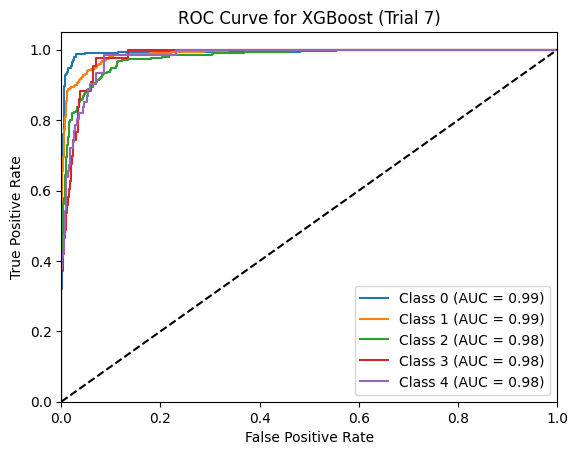

[I 2024-10-15 11:23:58,736] A new study created in memory with name: no-name-2f19d456-4594-4215-a371-c1067a5c04b9


Running hyperparameter tuning for LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20545
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 690
[LightGBM] [Info] Start training from score -1.137700
[LightGBM] [Info] Start training from score -1.229291
[LightGBM] [Info] Start training from score -1.193839
[LightGBM] [Info] Start training from score -3.268708
[LightGBM] [Info] Start training from score -3.082744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[I 2024-10-15 11:24:02,006] Trial 0 finished with value: 0.9175 and parameters: {'learning_rate': 0.07709519708617887, 'n_estimators': 197, 'num_leaves': 66}. Best is trial 0 with value: 0.9175.



=============== LightGBM Trial 1 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.917500, Precision=0.917500, Recall=0.917500, F1 Score=0.917500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20545
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 690
[LightGBM] [Info] Start training from score -1.137700
[LightGBM] [Info] Start training from score -1.229291
[LightGBM] [Info] Start training from score -1.193839
[LightGBM] [Info] Start training from score -3.268708
[LightGBM] [Info] Start training from score -3.082744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-10-15 11:24:06,506] Trial 1 finished with value: 0.9141666666666667 and parameters: {'learning_rate': 0.010404697021087478, 'n_estimators': 230, 'num_leaves': 64}. Best is trial 0 with value: 0.9175.



=============== LightGBM Trial 2 on Training & Validation Set ===============
Training Set: Accuracy=0.992500, Precision=0.992500, Recall=0.992500, F1 Score=0.992500
Validation Set: Accuracy=0.914167, Precision=0.914167, Recall=0.914167, F1 Score=0.914167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20545
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 690
[LightGBM] [Info] Start training from score -1.137700
[LightGBM] [Info] Start training from score -1.229291
[LightGBM] [Info] Start training from score -1.193839
[LightGBM] [Info] Start training from score -3.268708
[LightGBM] [Info] Start training from score -3.082744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-10-15 11:24:11,207] Trial 2 finished with value: 0.9141666666666667 and parameters: {'learning_rate': 0.034459792564165245, 'n_estimators': 256, 'num_leaves': 75}. Best is trial 0 with value: 0.9175.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

=============== LightGBM Trial 3 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.914167, Precision=0.914167, Recall=0.914167, F1 Score=0.914167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20545
[LightGBM] [Info] Number of data

[I 2024-10-15 11:24:15,929] Trial 3 finished with value: 0.9166666666666666 and parameters: {'learning_rate': 0.05862192988066036, 'n_estimators': 230, 'num_leaves': 99}. Best is trial 0 with value: 0.9175.



=============== LightGBM Trial 4 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.916667, Precision=0.916667, Recall=0.916667, F1 Score=0.916667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20545
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 690
[LightGBM] [Info] Start training from score -1.137700
[LightGBM] [Info] Start training from score -1.229291
[LightGBM] [Info] Start training from score -1.193839
[LightGBM] [Info] Start training from score -3.268708
[LightGBM] [Info] Start training from score -3.082744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-10-15 11:24:17,740] Trial 4 finished with value: 0.9175 and parameters: {'learning_rate': 0.11397739310875453, 'n_estimators': 130, 'num_leaves': 52}. Best is trial 0 with value: 0.9175.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

=============== LightGBM Trial 5 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.917500, Precision=0.917500, Recall=0.917500, F1 Score=0.

[I 2024-10-15 11:24:19,518] Trial 5 finished with value: 0.9283333333333333 and parameters: {'learning_rate': 0.1327599977407501, 'n_estimators': 213, 'num_leaves': 24}. Best is trial 5 with value: 0.9283333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-15 11:24:21,134] Trial 6 finished with value: 0.9125 and parameters: {'learning_rate': 0.19134152180524125, 'n_estimators': 165, 'num_leaves': 66}. Best is trial 5 with value: 0.9283333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-15 11:24:23,338] Trial 7 finished with value: 0.9191666666666667 and parameters: {'learning_rate': 0.1571909346541187, 'n_estimators': 196, 'num_leaves': 84}. Best is trial 5 with value: 0.9283333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-15 11:24:26,530] Trial 8 finished with value: 0.915 and parameters: {'learning_rate': 0.023907637378877713, 'n_estimators': 201, 'num_leaves': 52}. Best is trial 5 with value: 0.9283333333333333.



=============== LightGBM Trial 9 on Training & Validation Set ===============
Training Set: Accuracy=1.000000, Precision=1.000000, Recall=1.000000, F1 Score=1.000000
Validation Set: Accuracy=0.915000, Precision=0.915000, Recall=0.915000, F1 Score=0.915000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20545
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 690
[LightGBM] [Info] Start training from score -1.137700
[LightGBM] [Info] Start training from score -1.229291
[LightGBM] [Info] Start training from score -1.193839
[LightGBM] [Info] Start training from score -3.268708
[LightGBM] [Info] Start training from score -3.082744


[I 2024-10-15 11:24:28,403] Trial 9 finished with value: 0.9033333333333333 and parameters: {'learning_rate': 0.010074454756391495, 'n_estimators': 213, 'num_leaves': 25}. Best is trial 5 with value: 0.9283333333333333.



=============== LightGBM Trial 10 on Training & Validation Set ===============
Training Set: Accuracy=0.971944, Precision=0.971944, Recall=0.971944, F1 Score=0.971944
Validation Set: Accuracy=0.903333, Precision=0.903333, Recall=0.903333, F1 Score=0.903333
Best score for LightGBM: 0.9283333333333333
Best trial params for LightGBM in Trial 6: {'learning_rate': 0.1327599977407501, 'n_estimators': 213, 'num_leaves': 24}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20545
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 690
[LightGBM] [Info] Start training from score -1.137700
[LightGBM] [Info] Start training from score -1.229291
[LightGBM] [Info] Start training from score -1.193839
[LightGBM] [Info] Start training from score -3.268708
[LightGBM] [Info] Start training from score -3.082744
[LightGBM] [Warni

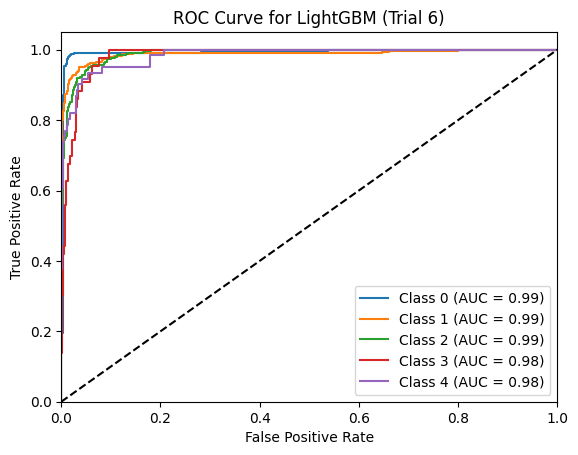

Models and predictions saved successfully.


,libellé,réponse,clean_libellé,clean_réponse,combined_input,label,modalités de réponse,Logistic Regression_predict,Naive Bayes_predict,SVM_predict,Random Forest_predict,XGBoost_predict,LightGBM_predict
1872,Avez-vous trouvé que les différentes options (...,"Non, on ne m’a proposé aucune alternative, jus...",avezvous trouvé différentes options traitement...,non proposé aucune alternative juste traitemen...,avezvous trouvé différentes options traitement...,0,"0,1,2",0,0,0,0,0,0
4483,Vous êtes-vous senti(e) en confiance ?,"Oui, j’ai senti que je pouvais parler libremen...",êtesvous sentie confiance,oui jai senti pouvais parler librement ressent...,êtesvous sentie confiance oui jai senti pouvai...,2,"0,1,2",4,0,2,2,2,2
3547,Avez-vous été informé(e) sur l’existence d’ini...,On m’a brièvement mentionné qu’il existait des...,avezvous informée surlexistence dinitiatives p...,brièvement mentionné quil existait initiatives...,avezvous informée surlexistence dinitiatives p...,1,"0,1,2",1,1,1,1,1,1
3984,Vous êtes-vous senti(e) écouté(e) ?,"Non, je ne me suis pas senti(e) écouté(e). Mon...",êtesvous sentie écoutée,non sentie écoutée psychiatre trop concentrée ...,êtesvous sentie écoutée non sentie écoutée psy...,0,"0,1,2,3,4",0,0,0,0,0,0
5285,Avez-vous trouvé que vos pratiques culturelles...,"Dans l’ensemble, mes besoins religieux ont été...",avezvous trouvé pratiques culturelles religieu...,lensemble besoins religieux pris compte a quel...,avezvous trouvé pratiques culturelles religieu...,1,"0,1,2",1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,Avez-vous eu confiance dans l’intérêt et l’eff...,Je n’ai pas vu de réels changements avec ce tr...,avezvous confiance lintérêt lefficacité traite...,nai vu réels changements traitement laissé per...,avezvous confiance lintérêt lefficacité traite...,1,"0,1,2,3,4",1,0,1,1,1,1
5351,Avez-vous trouvé que vos droits ont été respec...,"Non, j'ai eu l'impression que mes droits n'éta...",avezvous trouvé droits respectés,non jai limpression droits nétaient toujours r...,avezvous trouvé droits respectés non jai limpr...,0,"0,1,2",0,1,0,0,0,0
1606,Avez-vous trouvé que vous avez été impliqué(e)...,"Oui, j’ai vraiment apprécié qu’on me demande m...",avezvous trouvé impliquée décisions choix trai...,oui jai vraiment apprécié quon demande avis qu...,avezvous trouvé impliquée décisions choix trai...,2,"0,1,2",2,1,2,2,2,2
366,Avez-vous ressenti(e) une absence de soins ?*,"Oui, après ma sortie de l’hôpital, je n’ai pas...",avezvous ressentie absence soins,oui après sortie lhôpital nai suivi pendant lo...,avezvous ressentie absence soins oui après sor...,0,"0,1,2",0,0,0,0,0,0


CPU times: user 42min 7s, sys: 3.23 s, total: 42min 10s
Wall time: 6min 32s


In [ ]:
%%time
import os
import re
import logging
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

# -----------------------------------
# 1. Configuration and Setup
# -----------------------------------
log_dir = os.getcwd()
outputs_dir = os.path.join(log_dir, 'Outputs')
models_dir = os.path.join(outputs_dir, 'Saved_Models')
results_dir = os.path.join(outputs_dir, 'Predicted_Results')
logging_dir = os.path.join(outputs_dir, 'Logging_Directory')

os.makedirs(models_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(logging_dir, exist_ok=True)

info_log_file = os.path.join(logging_dir, 'all_logs.txt')
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.FileHandler(info_log_file, mode='w')]
)
logger = logging.getLogger(__name__)

# -----------------------------------
# 2. Data Preprocessing
# -----------------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Zà-ùÀ-ÙéÉèÈçÇ ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df = item_bank.copy()
df['clean_libellé'] = df['libellé'].apply(clean_text)
df['clean_réponse'] = df['réponse'].apply(clean_text)
df['combined_input'] = df['clean_libellé'] + " " + df['clean_réponse']

# -----------------------------------
# 3. Load the Dataset and Split for Training/Validation/Testing (60-20-20 Split)
# -----------------------------------
df = df[['libellé', 'réponse', 'clean_libellé', 'clean_réponse', 'combined_input', 'échelle de Likert', 'modalités de réponse']].rename(columns={'échelle de Likert': 'label'})
train_df, temp_df = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=True, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_df['combined_input'])
X_valid = vectorizer.transform(valid_df['combined_input'])
X_test = vectorizer.transform(test_df['combined_input'])
y_train = train_df['label']
y_valid = valid_df['label']
y_test = test_df['label']

# -----------------------------------
# 4. Model Setup
# -----------------------------------
models = {
    "Logistic Regression": LogisticRegression,
    "Naive Bayes": MultinomialNB,
    "SVM": SVC,
    "Random Forest": RandomForestClassifier,
    "XGBoost": xgb.XGBClassifier,
    "LightGBM": lgb.LGBMClassifier
}

# -----------------------------------
# 5. ROC-AUC Calculation and Plotting
# -----------------------------------
def plot_auc_roc(model_name, y_test, y_test_pred_prob, n_classes, trial_number):
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} (Trial {trial_number})')
    plt.legend(loc="lower right")
    plt.show()

# -----------------------------------
# 6. Hyperparameter Tuning with Optuna (Create Six Prediction Columns + Print Training/Validation Results)
# -----------------------------------
def objective(trial, model_name):
    trial_number = trial.number + 1

    # Model selection and hyperparameter suggestions
    if model_name == "Logistic Regression":
        C = trial.suggest_float('C', 0.01, 100, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
        solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
        model = LogisticRegression(C=C, penalty=penalty, solver=solver)
        best_params = {'C': C, 'penalty': penalty, 'solver': solver}

    elif model_name == "Naive Bayes":
        alpha = trial.suggest_float('alpha', 0.1, 10, log=True)
        model = MultinomialNB(alpha=alpha)
        best_params = {'alpha': alpha}

    elif model_name == "SVM":
        C = trial.suggest_float('C', 0.1, 100, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
        model = SVC(C=C, kernel=kernel, probability=True)
        best_params = {'C': C, 'kernel': kernel}

    elif model_name == "Random Forest":
        n_estimators = trial.suggest_int('n_estimators', 100, 300)
        max_depth = trial.suggest_int('max_depth', 10, 30)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }

    elif model_name == "XGBoost":
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        n_estimators = trial.suggest_int('n_estimators', 100, 300)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = xgb.XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
        best_params = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}

    elif model_name == "LightGBM":
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        n_estimators = trial.suggest_int('n_estimators', 100, 300)
        num_leaves = trial.suggest_int('num_leaves', 20, 100)
        model = lgb.LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, num_leaves=num_leaves)
        best_params = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'num_leaves': num_leaves}

    model.fit(X_train, y_train)            # Train the model on the training set (train_df)

    y_train_pred = model.predict(X_train)  # Predictions on the training set

    y_valid_pred = model.predict(X_valid)  # Predictions on the validation set (valid_df)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='micro')
    train_recall = recall_score(y_train, y_train_pred, average='micro')
    train_f1 = f1_score(y_train, y_train_pred, average='micro')

    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_precision = precision_score(y_valid, y_valid_pred, average='micro')
    valid_recall = recall_score(y_valid, y_valid_pred, average='micro')
    valid_f1 = f1_score(y_valid, y_valid_pred, average='micro')

    print(f"\n=============== {model_name} Trial {trial_number} on Training & Validation Set ===============")
    print(f"Training Set: Accuracy={train_accuracy:.6f}, Precision={train_precision:.6f}, Recall={train_recall:.6f}, F1 Score={train_f1:.6f}")
    print(f"Validation Set: Accuracy={valid_accuracy:.6f}, Precision={valid_precision:.6f}, Recall={valid_recall:.6f}, F1 Score={valid_f1:.6f}")
    print("==============================================================")

    return valid_accuracy, best_params

predicted_columns = []

for model_name in models.keys():
    print(f"Running hyperparameter tuning for {model_name}")

    study = optuna.create_study(direction='maximize')

    def objective_wrapper(trial):
        accuracy, best_params = objective(trial, model_name)
        trial.set_user_attr("best_params", best_params)  # Store the best params in the trial
        return accuracy

    study.optimize(objective_wrapper, n_trials=10)

    trial_number = study.best_trial.number + 1
    best_params = study.best_trial.user_attrs['best_params']
    print(f"Best score for {model_name}: {study.best_value}")
    print(f"Best trial params for {model_name} in Trial {trial_number}: {best_params}\n")

    final_model = models[model_name](**best_params)  # Final model training on train_df and evaluation on test_df
    final_model.fit(X_train, y_train)

    y_test_pred = final_model.predict(X_test)

    # Get predicted probabilities for ROC curve
    if hasattr(final_model, "predict_proba"):
        y_test_pred_prob = final_model.predict_proba(X_test)
    else:
        y_test_pred_prob = final_model.decision_function(X_test)  # For SVM

    pred_column_name = f"{model_name}_predict"
    test_df[pred_column_name] = y_test_pred
    predicted_columns.append(pred_column_name)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')

    print(f"\n=============== {model_name} Final Evaluation on Test Set ===============")
    print(f"Test Set: Accuracy={test_accuracy:.6f}, Precision={test_precision:.6f}, Recall={test_recall:.6f}, F1 Score={test_f1:.6f}")
    print("==============================================================")

    # Plot ROC-AUC for the best trial
    n_classes = len(set(y_test))  # Get number of classes
    plot_auc_roc(model_name, y_test, y_test_pred_prob, n_classes, trial_number)


# -----------------------------------
# 7. Save Results
# -----------------------------------
results_save_path = os.path.join(results_dir, 'test0_machinelearning.xlsx')
test_df.to_excel(results_save_path, index=False)
logger.info(f"Test predictions saved to {results_save_path}")
print("Models and predictions saved successfully.")

display(test_df)

### 7.0.2 [Deep Learning Models](#toc7_0_2_)
<div style="background-color: lightskyblue; width: 100%; height: 30px; padding: 10px; display: center; justify-content: center; align-items: center;">
  <p style="text-align: center; font-size: 20px; font-weight:bold;">
    BiLSTM
  </p>
</div>

In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.python.client import device_lib

# List devices to check if GPU is detected
print(device_lib.list_local_devices())
print("============================================================")
!pip show tensorflow
print("============================================================")

# Check if TensorFlow is using the GPU
if tf.config.list_physical_devices('GPU'):
    print("GPU Available:", tf.test.is_gpu_available())
    print("============================================================")
    print("GPU Devices:", tf.config.list_physical_devices('GPU'))
    print("============================================================")
    print(f"TensorFlow is using the GPU: {tf.config.list_physical_devices('GPU')}")
else:
    print("TensorFlow is NOT using the GPU.")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7937223477402887859
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9973006336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7385440071082190249
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1728654068.591076    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654068.709862    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654068.709937    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654068.824067    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654068.824135    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: tf_keras
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: True
GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is using the GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1728654073.814285    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654073.814401    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654073.814424    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654073.815631    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728654073.815676    1941 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

[nltk_data] Downloading package stopwords to /home/sz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[I 2024-10-15 11:32:09,322] A new study created in memory with name: no-name-75a2c295-9bdb-433e-ae9c-3cb7fae3e886


Training with Word2Vec Embeddings trainable=False Trial 1
Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3047 - loss: 1.4435 - val_accuracy: 0.3292 - val_loss: 1.3408
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3706 - loss: 1.3486 - val_accuracy: 0.5792 - val_loss: 1.0793
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5932 - loss: 1.0476 - val_accuracy: 0.7300 - val_loss: 0.7889
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7478 - loss: 0.7525 - val_accuracy: 0.7708 - val_loss: 0.6288
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7843 - loss: 0.6218 - val_accuracy: 0.7792 - val_loss: 0.5664
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2024-10-15 11:32:21,231] Trial 0 finished with value: 0.7791666666666667 and parameters: {'trainable': False, 'lstm_units': 155, 'dropout_rate': 0.2016687145228334, 'learning_rate': 9.448239550209423e-05, 'epochs': 5, 'batch_size': 32}. Best is trial 0 with value: 0.7791666666666667.



=============== Trial 1 on Validation Set ===============
Accuracy: 0.779167
Precision: 0.779167
Recall: 0.779167
F1 Score: 0.779167
Training with Word2Vec Embeddings trainable=False Trial 2
Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3552 - loss: 1.3997 - val_accuracy: 0.7492 - val_loss: 0.7558
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7470 - loss: 0.7425 - val_accuracy: 0.8033 - val_loss: 0.5054
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8126 - loss: 0.4846 - val_accuracy: 0.8383 - val_loss: 0.4002
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8550 - loss: 0.3521 - val_accuracy: 0.8733 - val_loss: 0.3506
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8844 - loss: 0.3219 - val_accuracy: 0.8983 - val_loss: 0.3122
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9082 - loss: 0.2364 - val_accuracy: 0.9183 - val_loss: 0.2585
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━

[I 2024-10-15 11:32:43,611] Trial 1 finished with value: 0.9333333333333333 and parameters: {'trainable': False, 'lstm_units': 213, 'dropout_rate': 0.39566843936655693, 'learning_rate': 0.000521003674099268, 'epochs': 11, 'batch_size': 32}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 2 on Validation Set ===============
Accuracy: 0.933333
Precision: 0.933333
Recall: 0.933333
F1 Score: 0.933333
Training with Word2Vec Embeddings trainable=True Trial 3
Epoch 1/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2392 - loss: 1.5753 - val_accuracy: 0.3025 - val_loss: 1.4132
Epoch 2/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2921 - loss: 1.4439 - val_accuracy: 0.3150 - val_loss: 1.3682
Epoch 3/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3171 - loss: 1.3925 - val_accuracy: 0.3525 - val_loss: 1.3529
Epoch 4/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3188 - loss: 1.3862 - val_accuracy: 0.3742 - val_loss: 1.3428
Epoch 5/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3406 - loss: 1.3758 - val_accuracy: 0.3975 - val_loss: 1.3346
Epoch 6/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3427 - loss: 1.3497 - val_accuracy: 0.4292 - val_loss: 1.3250
Epoch 7/17
113/113 ━━━━━━━━━━━━━━━━

[I 2024-10-15 11:33:17,653] Trial 2 finished with value: 0.755 and parameters: {'trainable': True, 'lstm_units': 115, 'dropout_rate': 0.23540637794139135, 'learning_rate': 1.5358972085622122e-05, 'epochs': 17, 'batch_size': 32}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 3 on Validation Set ===============
Accuracy: 0.755000
Precision: 0.755000
Recall: 0.755000
F1 Score: 0.755000
Training with Word2Vec Embeddings trainable=False Trial 4
Epoch 1/19
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2987 - loss: 1.5938 - val_accuracy: 0.3075 - val_loss: 1.4640
Epoch 2/19
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2828 - loss: 1.5074 - val_accuracy: 0.3075 - val_loss: 1.4169
Epoch 3/19
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3211 - loss: 1.4559 - val_accuracy: 0.3208 - val_loss: 1.3937
Epoch 4/19
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3204 - loss: 1.4295 - val_accuracy: 0.3383 - val_loss: 1.3787
Epoch 5/19
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3155 - loss: 1.4389 - val_accuracy: 0.3558 - val_loss: 1.3707
Epoch 6/19
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3097 - loss: 1.4266 - val_accuracy: 0.3675 - val_loss: 1.3647
Epoch 7/19
113/113 ━━━━━━━━━━━━━━━

[I 2024-10-15 11:33:58,362] Trial 3 finished with value: 0.5691666666666667 and parameters: {'trainable': False, 'lstm_units': 92, 'dropout_rate': 0.30024474241991617, 'learning_rate': 1.2044989361552389e-05, 'epochs': 19, 'batch_size': 32}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 4 on Validation Set ===============
Accuracy: 0.569167
Precision: 0.569167
Recall: 0.569167
F1 Score: 0.569167
Training with Word2Vec Embeddings trainable=False Trial 5
Epoch 1/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2718 - loss: 1.5008 - val_accuracy: 0.4042 - val_loss: 1.3432
Epoch 2/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3389 - loss: 1.3805 - val_accuracy: 0.5208 - val_loss: 1.2978
Epoch 3/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4013 - loss: 1.3193 - val_accuracy: 0.6025 - val_loss: 1.1241
Epoch 4/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5304 - loss: 1.1450 - val_accuracy: 0.6825 - val_loss: 0.9690
Epoch 5/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6440 - loss: 0.9615 - val_accuracy: 0.7425 - val_loss: 0.7793
Epoch 6/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7310 - loss: 0.7906 - val_accuracy: 0.7667 - val_loss: 0.6580
Epoch 7/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/

[I 2024-10-15 11:34:06,183] Trial 4 finished with value: 0.8266666666666667 and parameters: {'trainable': False, 'lstm_units': 150, 'dropout_rate': 0.33639734878986494, 'learning_rate': 0.0002071704798880811, 'epochs': 11, 'batch_size': 128}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 5 on Validation Set ===============
Accuracy: 0.826667
Precision: 0.826667
Recall: 0.826667
F1 Score: 0.826667
Training with Word2Vec Embeddings trainable=True Trial 6
Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.3058 - loss: 1.5368 - val_accuracy: 0.4492 - val_loss: 1.3139
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3955 - loss: 1.3356 - val_accuracy: 0.6275 - val_loss: 0.9983
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6695 - loss: 0.9382 - val_accuracy: 0.7758 - val_loss: 0.6293
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7685 - loss: 0.6791 - val_accuracy: 0.7875 - val_loss: 0.5570
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7973 - loss: 0.5773 - val_accuracy: 0.8117 - val_loss: 0.4878
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8234 - loss: 0.4843 - val_accuracy: 0.8242 - val_loss: 0.4370
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/s

[I 2024-10-15 11:34:16,714] Trial 5 finished with value: 0.8983333333333333 and parameters: {'trainable': True, 'lstm_units': 200, 'dropout_rate': 0.4560748191659067, 'learning_rate': 0.0004282593608886089, 'epochs': 12, 'batch_size': 128}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 6 on Validation Set ===============
Accuracy: 0.898333
Precision: 0.898333
Recall: 0.898333
F1 Score: 0.898333
Training with Word2Vec Embeddings trainable=True Trial 7
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2959 - loss: 1.4788 - val_accuracy: 0.2950 - val_loss: 1.3891
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3062 - loss: 1.4160 - val_accuracy: 0.3342 - val_loss: 1.3670
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3233 - loss: 1.3878 - val_accuracy: 0.3392 - val_loss: 1.3594
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3172 - loss: 1.3895 - val_accuracy: 0.3775 - val_loss: 1.3543
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3062 - loss: 1.3877 - val_accuracy: 0.3950 - val_loss: 1.3502
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3257 - loss: 1.3751 - val_accuracy: 0.3800 - val_loss: 1.3437
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/s

[I 2024-10-15 11:34:30,314] Trial 6 finished with value: 0.5225 and parameters: {'trainable': True, 'lstm_units': 68, 'dropout_rate': 0.27041573038502376, 'learning_rate': 3.656042395958318e-05, 'epochs': 10, 'batch_size': 64}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 7 on Validation Set ===============
Accuracy: 0.522500
Precision: 0.522500
Recall: 0.522500
F1 Score: 0.522500
Training with Word2Vec Embeddings trainable=True Trial 8
Epoch 1/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2835 - loss: 1.4954 - val_accuracy: 0.3575 - val_loss: 1.3535
Epoch 2/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3165 - loss: 1.3931 - val_accuracy: 0.3383 - val_loss: 1.3423
Epoch 3/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3432 - loss: 1.3665 - val_accuracy: 0.4608 - val_loss: 1.3254
Epoch 4/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3486 - loss: 1.3460 - val_accuracy: 0.4783 - val_loss: 1.3033
Epoch 5/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3738 - loss: 1.3373 - val_accuracy: 0.5442 - val_loss: 1.2563
Epoch 6/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4486 - loss: 1.2591 - val_accuracy: 0.6492 - val_loss: 1.1290
Epoch 7/11
29/29 ━━━━━━━━━━━━━━━━━━━━ -0s -1423

[I 2024-10-15 11:34:38,546] Trial 7 finished with value: 0.7808333333333334 and parameters: {'trainable': True, 'lstm_units': 182, 'dropout_rate': 0.302886261407683, 'learning_rate': 7.211444274451214e-05, 'epochs': 11, 'batch_size': 128}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 8 on Validation Set ===============
Accuracy: 0.780833
Precision: 0.780833
Recall: 0.780833
F1 Score: 0.780833
Training with Word2Vec Embeddings trainable=False Trial 9
Epoch 1/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1880 - loss: 1.7583 - val_accuracy: 0.2975 - val_loss: 1.4980
Epoch 2/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2595 - loss: 1.5865 - val_accuracy: 0.2875 - val_loss: 1.4408
Epoch 3/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2845 - loss: 1.5298 - val_accuracy: 0.2917 - val_loss: 1.4125
Epoch 4/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2991 - loss: 1.4898 - val_accuracy: 0.2917 - val_loss: 1.3954
Epoch 5/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2974 - loss: 1.4720 - val_accuracy: 0.2933 - val_loss: 1.3858
Epoch 6/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3044 - loss: 1.4574 - val_accuracy: 0.2942 - val_loss: 1.3797
Epoch 7/18
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/

[I 2024-10-15 11:34:58,134] Trial 8 finished with value: 0.4 and parameters: {'trainable': False, 'lstm_units': 124, 'dropout_rate': 0.4848776569338083, 'learning_rate': 1.565780253243398e-05, 'epochs': 18, 'batch_size': 64}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 9 on Validation Set ===============
Accuracy: 0.400000
Precision: 0.400000
Recall: 0.400000
F1 Score: 0.400000
Training with Word2Vec Embeddings trainable=False Trial 10
Epoch 1/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2921 - loss: 1.4880 - val_accuracy: 0.3658 - val_loss: 1.3290
Epoch 2/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3621 - loss: 1.3458 - val_accuracy: 0.6983 - val_loss: 0.9204
Epoch 3/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6856 - loss: 0.9240 - val_accuracy: 0.7758 - val_loss: 0.6490
Epoch 4/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7641 - loss: 0.7060 - val_accuracy: 0.7875 - val_loss: 0.5362
Epoch 5/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7898 - loss: 0.5946 - val_accuracy: 0.8283 - val_loss: 0.4668
Epoch 6/17
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8251 - loss: 0.4868 - val_accuracy: 0.8442 - val_loss: 0.4239
Epoch 7/17
113/113 ━━━━━━━━━━━━━━━

[I 2024-10-15 11:35:30,864] Trial 9 finished with value: 0.9208333333333333 and parameters: {'trainable': False, 'lstm_units': 196, 'dropout_rate': 0.4593451105211413, 'learning_rate': 0.00017213119450813568, 'epochs': 17, 'batch_size': 32}. Best is trial 1 with value: 0.9333333333333333.



=============== Trial 10 on Validation Set ===============
Accuracy: 0.920833
Precision: 0.920833
Recall: 0.920833
F1 Score: 0.920833
Best hyperparameters: in Trial 2
Best score: 0.9333333333333333
Best hyperparameters: 
trainable: False
lstm_units: 213
dropout_rate: 0.39566843936655693
learning_rate: 0.000521003674099268
epochs: 11
batch_size: 32
Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3761 - loss: 1.3654 - val_accuracy: 0.7367 - val_loss: 0.7759
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7447 - loss: 0.7451 - val_accuracy: 0.7983 - val_loss: 0.5273
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8116 - loss: 0.5095 - val_accuracy: 0.8400 - val_loss: 0.3954
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8673 - loss: 0.3611 - val_accuracy: 0.8817 - val_loss: 0.3128
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9014 - loss: 0.2753 - val_accuracy: 0.8875 - val_loss: 0.3084
Epoch

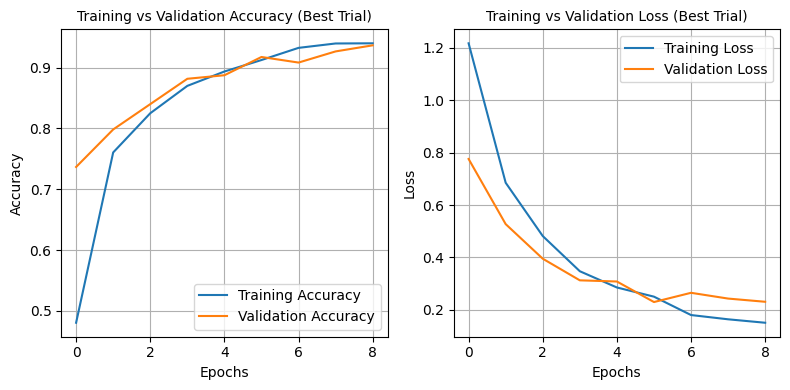

Models and predictions saved successfully.


,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert,clean_libellé,clean_réponse,combined_input,LSTM_predict
1782,33,DT31,"0,1,2",Avez-vous trouvé que votre traitement médicame...,Il y avait des jours où je me sentais plus fat...,1,avezvous trouvé traitement médicamenteux a mod...,jours où sentais plus fatiguée dhabitude cela ...,avezvous trouvé traitement médicamenteux a mod...,1
3917,18,IR19,"0,1,2,3,4",Avez-vous trouvé que vous avez pu définir des ...,Mon psychiatre semblait intéressé(e) par mes o...,2,avezvous trouvé pu définir objectifs communs p...,psychiatre semblait intéressée objectifs nétai...,avezvous trouvé pu définir objectifs communs p...,2
221,22,ACC14,"0,1,2",Avez-vous trouvé que les professionnels de san...,"Non, à aucun moment je n’ai eu de contradictio...",2,avezvous trouvé professionnels santé donné inf...,non aucun moment nai contradiction quon dit ch...,avezvous trouvé professionnels santé donné inf...,2
2135,36,DT10,"0,1,2",Avez-vous trouvé que la durée totale de votre ...,"On m’a donné des indications sur la durée, mai...",1,avezvous trouvé durée totale traitement médica...,donné indication durée elles restaient assez v...,avezvous trouvé durée totale traitement médica...,1
5224,25,RD4,"0,1,2",Avez-vous trouvé que votre intimité corporelle...,"Oui, à chaque fois que des soins étaient admin...",2,avezvous trouvé intimité corporelle a respectée,oui chaque fois soins administrés personnel de...,avezvous trouvé intimité corporelle a respecté...,2
...,...,...,...,...,...,...,...,...,...,...
2543,44,DT7,"0,1,2",Avez-vous trouvé que vos antécédents médicaux ...,"Non, mes antécédents médicaux n’ont pas été di...",0,avezvous trouvé antécédents médicaux allergy t...,non antécédents médicaux nont discutés détail ...,avezvous trouvé antécédents médicaux allergy t...,0
1773,24,DT31,"0,1,2",Avez-vous trouvé que votre traitement médicame...,"Il y avait quelques nuits où je dormais mal, m...",1,avezvous trouvé traitement médicamenteux a mod...,quelques nuits où dormais mal nétait systématique,avezvous trouvé traitement médicamenteux a mod...,1
2846,47,I19,"0,1,2",Avez-vous été informé(e) de la possibilité que...,"Non, je n’ai pas été informé(e) sur la possibi...",0,avezvous informée dela possibilité hospitalisé...,non nai informée possibilité dêtre hospitalisé...,avezvous informée dela possibilité hospitalisé...,0
5799,50,RD7,"0,1,2",Avez-vous été gêné(e) d’avoir à répondre à des...,"Oui, certaines questions étaient vraiment intr...",0,avezvous gênée davoir répondre question indisc...,oui certaines question vraiment intrusives not...,avezvous gênée davoir répondre question indisc...,0


CPU times: user 3min 26s, sys: 1min 13s, total: 4min 39s
Wall time: 3min 42s


In [ ]:
%%time
import os
import logging
import pandas as pd
import numpy as np
import nltk
import re
import gensim
import optuna
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# NLTK Stopwords and WordNet download
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('french'))
lemmatizer = WordNetLemmatizer()

# -----------------------------------
# 1. Configuration and Setup
# -----------------------------------
log_dir = os.getcwd()
outputs_dir = os.path.join(log_dir, 'Outputs')
models_dir = os.path.join(outputs_dir, 'Saved_Models')
results_dir = os.path.join(outputs_dir, 'Predicted_Results')
logging_dir = os.path.join(outputs_dir, 'Logging_Directory')

os.makedirs(models_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(logging_dir, exist_ok=True)

info_log_file = os.path.join(logging_dir, 'all_logs.txt')
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.FileHandler(info_log_file, mode='w')]
)
logger = logging.getLogger(__name__)

# -----------------------------------
# 2. Handling Misspellings and Lemmatization
# -----------------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Zà-ùÀ-ÙéÉèÈçÇ ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df = item_bank.copy()
df['clean_libellé'] = df['libellé'].apply(clean_text)
df['clean_réponse'] = df['réponse'].apply(clean_text)
df['combined_input'] = df['clean_libellé'] + " " + df['clean_réponse']

# -----------------------------------
# 3. Word2Vec Embedding
# -----------------------------------
sentences = [row.split() for row in df['combined_input']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(sentences, total_examples=len(sentences), epochs=10)

vocab_size = len(word2vec_model.wv.key_to_index) + 1  # Plus one for padding
embedding_matrix = np.zeros((vocab_size, 100))
for word, idx in word2vec_model.wv.key_to_index.items():
    embedding_matrix[idx] = word2vec_model.wv[word]

# -----------------------------------
# 4. Tokenization and Padding
# -----------------------------------
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['combined_input'])
sequences = tokenizer.texts_to_sequences(df['combined_input'])

max_sequence_length = int(np.mean([len(seq) for seq in sequences]) + 2 * np.std([len(seq) for seq in sequences]))  # Dynamically adjust max_sequence_length

X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
y = df['échelle de Likert']

# -----------------------------------
# 5. Split the Dataset: 60% Training, 20% Validation, 20% Testing
# -----------------------------------
X_train_val, X_test, y_train_val, y_test, idx_train_val, idx_test = train_test_split(X, y, df.index, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val, idx_train, idx_val = train_test_split(X_train_val, y_train_val, idx_train_val, test_size=0.25, random_state=42)

test_df = df.loc[idx_test].copy()  # Save original test set for display (use original indices)

# -----------------------------------
# 6. LSTM Model Creation Function
# -----------------------------------
def create_lstm_model(trial, embedding_matrix, vocab_size, trainable):
    lstm_units = trial.suggest_int('lstm_units', 64, 256)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], trainable=trainable))
    model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=False)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))  # Likert scale (0-4)

    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)  # Updated from suggest_loguniform to suggest_float
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------------
# 7. Optuna Objective Function
# -----------------------------------
def objective(trial):
    trainable = trial.suggest_categorical('trainable', [True, False])
    print(f"Training with Word2Vec Embeddings trainable={trainable} Trial {trial.number + 1}")  # Adjust trial number

    model = create_lstm_model(trial, embedding_matrix, vocab_size, trainable)

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=trial.suggest_int('epochs', 5, 20),
                        batch_size=trial.suggest_categorical('batch_size', [32, 64, 128]),
                        callbacks=[early_stopping],
                        verbose=1)

    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_val, y_pred_classes)

    # Metrics for the current trial
    precision = precision_score(y_val, y_pred_classes, average='micro')
    recall = recall_score(y_val, y_pred_classes, average='micro')
    f1 = f1_score(y_val, y_pred_classes, average='micro')

    print(f"\n=============== Trial {trial.number + 1} on Validation Set ===============")
    print(f"Accuracy: {accuracy:.6f}")
    print(f"Precision: {precision:.6f}")
    print(f"Recall: {recall:.6f}")
    print(f"F1 Score: {f1:.6f}")
    print("=========================================================")

    return accuracy

# -----------------------------------
# 8. Optuna Hyperparameter Tuning
# -----------------------------------
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_trial = study.best_trial
print("=========================================================")
print(f"Best hyperparameters: in Trial {best_trial.number + 1}")
print(f"Best score: {best_trial.value}")
print(f"Best hyperparameters: ")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")

# Train the final model with best hyperparameters
final_model = create_lstm_model(best_trial, embedding_matrix, vocab_size, best_trial.params['trainable'])

# Early stopping and training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = final_model.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=best_trial.params['epochs'],
                          batch_size=best_trial.params['batch_size'],
                          callbacks=[early_stopping],
                          verbose=1)

# Evaluate on test set
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='micro')
recall = recall_score(y_test, y_pred_classes, average='micro')
f1 = f1_score(y_test, y_pred_classes, average='micro')

print("=========================================================")
print(f"\nFinal Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")

# Add predictions to test set
test_df[f'LSTM_predict'] = y_pred_classes

# Save the trained model
model_save_path = os.path.join(models_dir, f'best_lstm_model.h5')
final_model.save(model_save_path)
logger.info(f"Best model saved to {model_save_path}")

# Plot Training Accuracy and Loss for the Best Model
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Training vs Validation Accuracy (Best Trial)', fontsize=10)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Training vs Validation Loss (Best Trial)', fontsize=10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# -----------------------------------
# 9. Save Results
# -----------------------------------
results_save_path = os.path.join(results_dir, 'test0_deeplearning.xlsx')
test_df.to_excel(results_save_path, index=False)
logger.info(f"Test predictions saved to {results_save_path}")

print("Models and predictions saved successfully.")
display(test_df)